In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from backend.config_state import ChatState
from backend.nodes import intent_classifier, general_query, router, doc_loader, text_splitter, vector_db, retrieve_documents, generation

c:\Users\uddin\Desktop\Prototype\CDSS_GP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


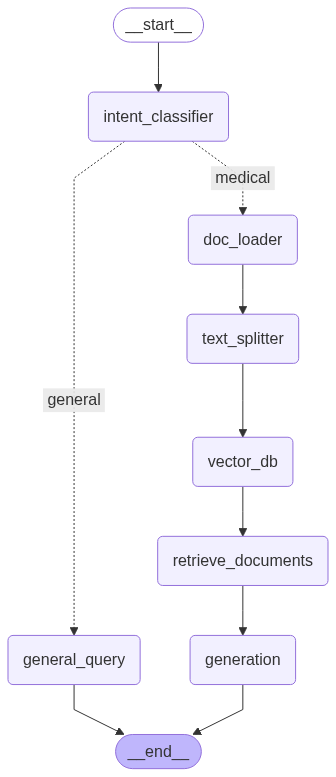

In [11]:
checkpointer = InMemorySaver()
graph = StateGraph(ChatState)
graph.add_node('intent_classifier', intent_classifier)
graph.add_node('general_query', general_query)
graph.add_node('doc_loader', doc_loader)
graph.add_node('text_splitter',text_splitter)
graph.add_node('vector_db',vector_db)
graph.add_node('retrieve_documents',retrieve_documents)
graph.add_node('generation',generation)

graph.set_entry_point('intent_classifier')
graph.add_conditional_edges(
    "intent_classifier",
    router,
    {
        "general": "general_query",
        "medical": "doc_loader"
    }
)
graph.add_edge("doc_loader", "text_splitter")
graph.add_edge("text_splitter", "vector_db")
graph.add_edge("vector_db", "retrieve_documents")
graph.add_edge("retrieve_documents", "generation")
graph.add_edge("generation", END)
graph.add_edge("general_query", END)
compiled_graph = graph.compile(checkpointer=checkpointer)
compiled_graph